In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
import pickle

In [2]:
data = pd.read_csv(r"E:\data\train.csv")

In [3]:
data.shape

(593994, 13)

In [4]:
data['grade_subgrade'].unique()

array(['C3', 'D3', 'C5', 'F1', 'D1', 'D5', 'C2', 'C1', 'F5', 'D4', 'C4',
       'D2', 'E5', 'B1', 'B2', 'F4', 'A4', 'E1', 'F2', 'B4', 'E4', 'B3',
       'E3', 'B5', 'E2', 'F3', 'A5', 'A3', 'A1', 'A2'], dtype=object)

In [5]:
train_data = data.copy()

In [6]:
train_data['loan_paid_back'].unique()

array([1., 0.])

In [7]:
train_data.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [8]:
train_data.drop(columns=['id'], inplace=True)

In [9]:
X = train_data.drop('loan_paid_back',axis=1)
y = train_data["loan_paid_back"]

In [10]:
# check the outlier in the data
def outlier_check(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

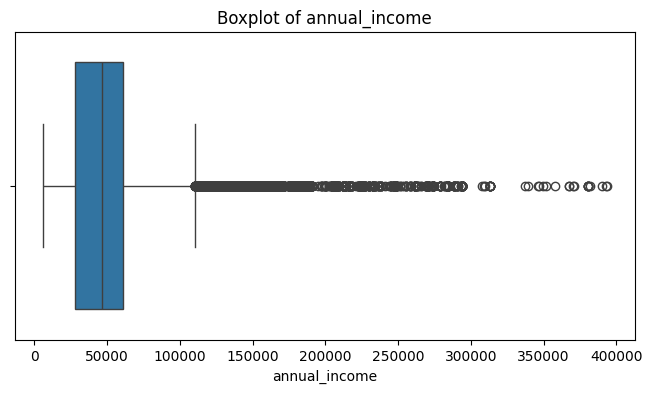

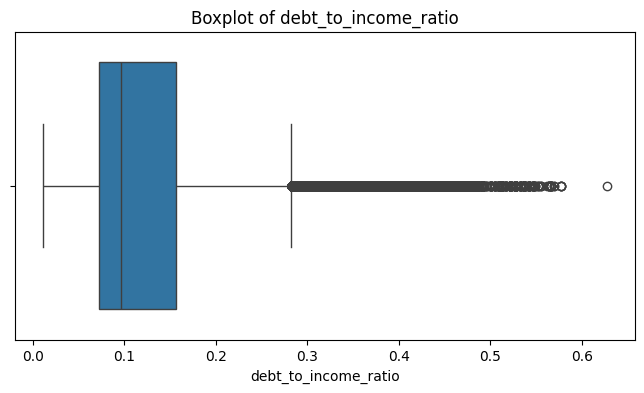

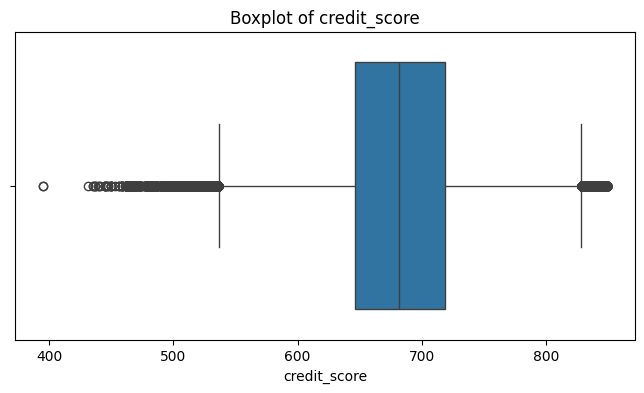

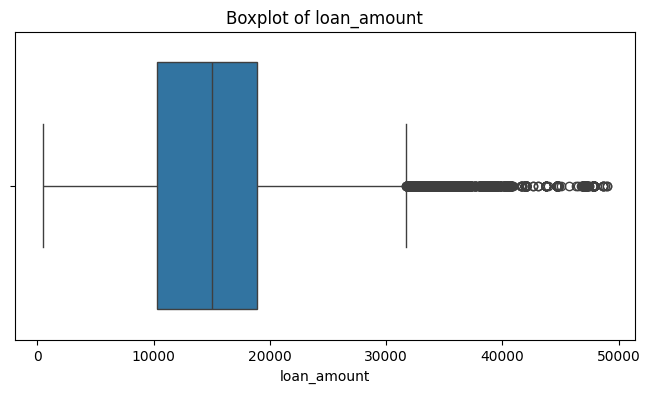

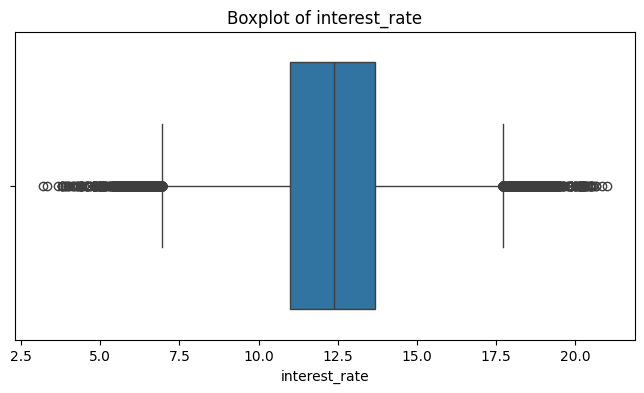

In [11]:
outlier_check(X)

here in the dataset have the good amount of outliers.
1. all the numeric columns i selected and plotted boxplots for each column.
2. from the boxplots we can see that there are some outliers present in the data.



In [12]:
def remove_outlier(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data


In [13]:
train_data['loan_paid_back'].unique()

array([1., 0.])

In [14]:
X = remove_outlier(X)

In [15]:
train_data['loan_paid_back'].unique()

array([1., 0.])

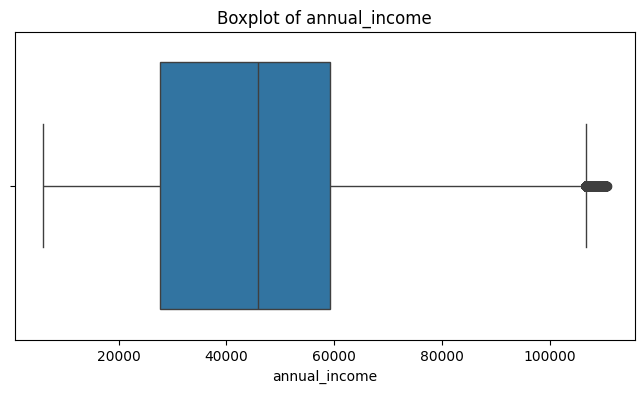

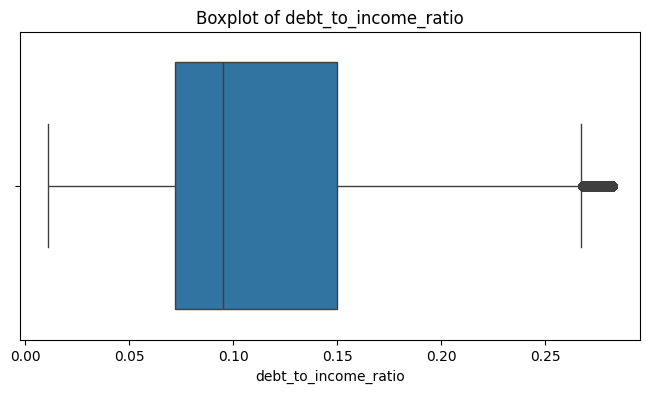

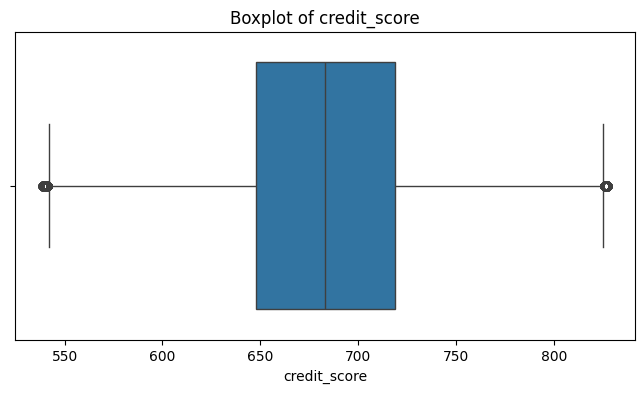

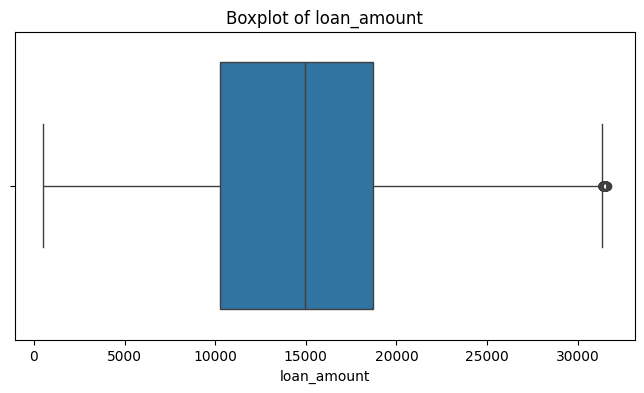

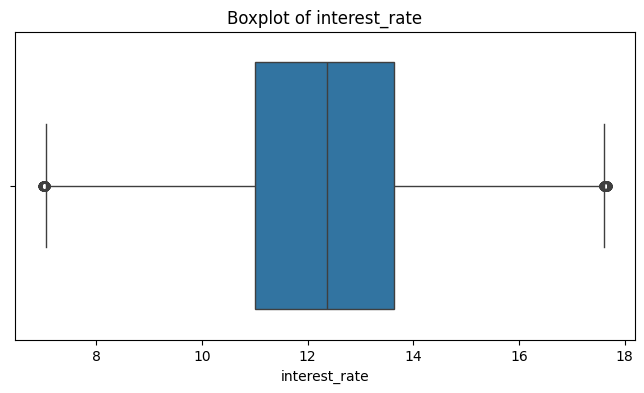

In [16]:
outlier_check(X)

checking again for the outliers after removing theam. we can see that there are no outliers present in the data now.

In [17]:
X.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1
5,44940.30,0.058,653,12159.92,12.24,Male,Single,Bachelor's,Employed,Other,D1


In [18]:
cat_cols = X.select_dtypes(include = ['object'])

In [19]:
cat_cols.columns

Index(['gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade'],
      dtype='object')

In [20]:
# split the Grade_Subgrade column:
def split_column(col):
    split_col = col.str.split(
        '', expand=True
    )
    return split_col

In [21]:
# we take the first character as Grade and the second character as Subgrade(integer)
X['Grade'] = split_column(X['grade_subgrade'])[1]
X['Subgrade'] = split_column(X['grade_subgrade'])[2].astype(int)
X.drop(columns=['grade_subgrade'], inplace=True)



In [22]:
X.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,Grade,Subgrade
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C,3
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D,3
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C,5
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D,1
5,44940.30,0.058,653,12159.92,12.24,Male,Single,Bachelor's,Employed,Other,D,1



 1.   we split the Grade_Subgrade column into two columns Grade and Subgrade.
 2.   Grade: categorical variable with values A to G
 3.   Subgrade: numerical variable with values 1 to 5
 4.   Subgrade shows the risk level within the grade.


----------------------------------------------------------------------------------------------------------------------


in the dataset have the some categorial columns.
## ['gender', 'marital_status', 'education_level', 'employment_status','loan_purpose', 'grade_subgrade']
1. i will be using the encoding for the categorial columns.[Label Encoding,OneHotEncoding]
2. and after that i will be select which columns should be keetped and which should be removed.

In [23]:
def encode_categorical(data):
    
    # Laber Encoding for binary categorical columns
    binary_cols  = [col for col in data.select_dtypes(include = ['object']).columns if data[col].unique().shape[0] == 2]
    
    for col in binary_cols:
        label_enc = LabelEncoder()
        data[col] = label_enc.fit_transform(data[col])
        
        
    # OneHot Encoding for multi-categorical columns
    multi_cal_col = [col for col in data.select_dtypes(include = ['object']).columns if data[col].unique().shape[0]>2]
    
    if len(multi_cal_col) > 0:
        onehot_enc = OneHotEncoder(sparse_output=False, drop='first')
        onh_data = onehot_enc.fit_transform(data[multi_cal_col])
        
        onehot_encoded = pd.DataFrame(
            onh_data,
            columns = onehot_enc.get_feature_names_out(multi_cal_col),
            index = data.index
        )
        
        data = pd.concat([data.drop(columns=multi_cal_col), onehot_encoded], axis=1)
        
    return data
  

In [24]:
X = encode_categorical(X)

In [25]:
X.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,Subgrade,gender_Male,gender_Other,marital_status_Married,marital_status_Single,...,loan_purpose_Education,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F
0,29367.99,0.084,736,2528.42,13.67,3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,22108.02,0.166,636,4593.10,12.92,3,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49566.20,0.097,694,17005.15,9.76,5,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,25496.70,0.053,665,12184.43,10.21,1,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,44940.30,0.058,653,12159.92,12.24,1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
X.shape

(547754, 31)

# after Encodign the number of columns increased to 55 from 13.
1. 1befaore the encodign  shape of the data: (593994, 13)
2. after encoding shape of the data:(444583,33 )
3. so we can see that the number of columns increased after encoding.
so may be this lead to the curse of dimensionality.


In [27]:
data['loan_paid_back'].unique()

array([1., 0.])

In [28]:
data['loan_paid_back'].head(52)


0     1.0
1     0.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    0.0
15    1.0
16    1.0
17    0.0
18    1.0
19    1.0
20    1.0
21    1.0
22    0.0
23    1.0
24    1.0
25    1.0
26    0.0
27    0.0
28    1.0
29    0.0
30    1.0
31    1.0
32    1.0
33    1.0
34    0.0
35    0.0
36    0.0
37    1.0
38    1.0
39    1.0
40    1.0
41    0.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    0.0
48    1.0
49    1.0
50    1.0
51    1.0
Name: loan_paid_back, dtype: float64

In [29]:
len(X.columns)

31

In [30]:
X.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,Subgrade,gender_Male,gender_Other,marital_status_Married,marital_status_Single,...,loan_purpose_Education,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F
0,29367.99,0.084,736,2528.42,13.67,3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,22108.02,0.166,636,4593.10,12.92,3,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49566.20,0.097,694,17005.15,9.76,5,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,25496.70,0.053,665,12184.43,10.21,1,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,44940.30,0.058,653,12159.92,12.24,1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
Training_data =  pd.concat([X, y], axis=1)

In [32]:
Training_data['loan_paid_back'].unique()

array([1., 0.])

In [33]:
# saving the Cleaned data
Training_data.to_csv('train_data_clean.csv', index=False)

In [34]:
test_data = pd.read_csv(r"E:\data\test.csv").drop(columns=['id'])    

In [35]:
test_data.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


In [36]:
test_data['Grade'] = split_column(test_data['grade_subgrade'])[1]
test_data['Subgrade'] = split_column(test_data['grade_subgrade'])[2].astype(int)
test_data.drop(columns=['grade_subgrade'], inplace=True)

In [37]:
test_data.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,Grade,Subgrade
0,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D,5
1,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C,1
2,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D,1
3,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C,3
4,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C,1


In [38]:
test_data = encode_categorical(test_data)

In [39]:
test_data.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,Subgrade,gender_Male,gender_Other,marital_status_Married,marital_status_Single,...,loan_purpose_Education,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F
0,28781.05,0.049,626,11461.42,14.73,5,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,46626.39,0.093,732,15492.25,12.85,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,54954.89,0.367,611,3796.41,13.29,1,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,25644.63,0.110,671,6574.30,9.57,3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,25169.64,0.081,688,17696.89,12.80,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
test_data.shape

(254569, 31)

In [41]:
test_data.to_csv('test_data_clean.csv', index=False)

In [42]:
train_data['loan_paid_back'].value_counts()

loan_paid_back
1.0    474494
0.0    119500
Name: count, dtype: int64